**# Data Analyst:: Cross selling recommendation - Group Project**

## How to increase cross selling of Banking Products_

_### Problem Statement:  XYZ credit union in Latin America is performing very well in selling the Banking products (eg: Credit card, deposit account, retirement account, safe deposit box etc) but their existing customer is not not buying more than 1 product which means bank is not performing good in cross selling (Bank is not able to sell their other offerings to existing customer). XYZ Credit Union decided to approach ABC analytics to solve their problem._

## Can you tell us how this can be solved? 

In [1]:
# Importing Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
# Data understanding
df = pd.read_csv('Train_sample.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365000 entries, 0 to 1364999
Data columns (total 48 columns):
 #   Column                 Non-Null Count    Dtype  
---  ------                 --------------    -----  
 0   fecha_dato             1365000 non-null  object 
 1   ncodpers               1365000 non-null  int64  
 2   ind_empleado           1362241 non-null  object 
 3   pais_residencia        1362241 non-null  object 
 4   sexo                   1362234 non-null  object 
 5   age                    1365000 non-null  object 
 6   fecha_alta             1362241 non-null  object 
 7   ind_nuevo              1362241 non-null  float64
 8   antiguedad             1365000 non-null  object 
 9   indrel                 1362241 non-null  float64
 10  ult_fec_cli_1t         2506 non-null     object 
 11  indrel_1mes            1350117 non-null  object 
 12  tiprel_1mes            1350117 non-null  object 
 13  indresi                1362241 non-null  object 
 14  indext            

In [3]:
# The data above would be difficult to interpret because of the language used(Spanish). I am therefore going to convert the columns to approximate english names to ease interpretation.

df = df.rename(columns={
    'fecha_dato': 'date_partition',
    'ncodpers': 'customer_code',
    'ind_empleado': 'employee_index',
    'pais_residencia': 'customer_country_residence',
    'sexo': 'customer_sex',
    'age': 'customer_age',
    'fecha_alta': 'customer_join_date',
    'ind_nuevo': 'new_customer_index',
    'antiguedad': 'customer_seniority',
    'indrel': 'primary_customer_index',
    'ult_fec_cli_1t': 'last_date_primary',
    'indrel_1mes': 'customer_type_beginning_month',
    'tiprel_1mes': 'customer_relation_beginning_month',
    'indresi': 'residence_index',
    'indext': 'foreigner_index',
    'conyuemp': 'spouse_index',
    'canal_entrada': 'channel_used_join',
    'indfall': 'deceased_index',
    'tipodom': 'address_type',
    'cod_prov': 'province_code',
    'nomprov': 'province_name',
    'ind_actividad_cliente': 'activity_index',
    'renta': 'gross_income_household',
    'segmento': 'segmentation',
    'ind_ahor_fin_ult1': 'savings_account',
    'ind_aval_fin_ult1': 'guarantees',
    'ind_cco_fin_ult1': 'current_accounts',
    'ind_cder_fin_ult1': 'derivada_account',
    'ind_cno_fin_ult1': 'payroll_account',
    'ind_ctju_fin_ult1': 'junior_account',
    'ind_ctma_fin_ult1': 'mas_particular_account',
    'ind_ctop_fin_ult1': 'particular_account',
    'ind_ctpp_fin_ult1': 'particular_plus_account',
    'ind_deco_fin_ult1': 'short_term_deposits',
    'ind_deme_fin_ult1': 'medium_term_deposits',
    'ind_dela_fin_ult1': 'long_term_deposits',
    'ind_ecue_fin_ult1': 'e_account',
    'ind_fond_fin_ult1': 'funds',
    'ind_hip_fin_ult1': 'mortgage',
    'ind_plan_fin_ult1': 'pensions_a',
    'ind_pres_fin_ult1': 'loans',
    'ind_reca_fin_ult1': 'taxes',
    'ind_tjcr_fin_ult1': 'credit_card',
    'ind_valo_fin_ult1': 'securities',
    'ind_viv_fin_ult1': 'home_account',
    'ind_nomina_ult1': 'payroll',
    'ind_nom_pens_ult1': 'pensions_b',
    'ind_recibo_ult1': 'direct_debit'
})
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1365000 entries, 0 to 1364999
Data columns (total 48 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   date_partition                     1365000 non-null  object 
 1   customer_code                      1365000 non-null  int64  
 2   employee_index                     1362241 non-null  object 
 3   customer_country_residence         1362241 non-null  object 
 4   customer_sex                       1362234 non-null  object 
 5   customer_age                       1365000 non-null  object 
 6   customer_join_date                 1362241 non-null  object 
 7   new_customer_index                 1362241 non-null  float64
 8   customer_seniority                 1365000 non-null  object 
 9   primary_customer_index             1362241 non-null  float64
 10  last_date_primary                  2506 non-null     object 
 11  customer_type_beginning_

In [4]:
# Display each column name as well as no. of missing values and percentage of total of missing values
missing_values = df.isnull().sum()
total_cells = np.product(df.shape)
total_missing = missing_values.sum()

print("Missing Values for each column:\n")
missing_percentage = (missing_values/df.shape[0]) * 100
missing_percentage_sorted = missing_percentage.sort_values(ascending=False)
for col in missing_percentage_sorted.index:
    print(col, ":", missing_values[col])
    print("Percentage of Missing Values:", missing_percentage_sorted[col], "\n")

Missing Values for each column:

spouse_index : 1364828
Percentage of Missing Values: 99.98739926739927 

last_date_primary : 1362494
Percentage of Missing Values: 99.81641025641026 

gross_income_household : 279255
Percentage of Missing Values: 20.45824175824176 

segmentation : 18847
Percentage of Missing Values: 1.3807326007326008 

channel_used_join : 18521
Percentage of Missing Values: 1.3568498168498169 

customer_type_beginning_month : 14883
Percentage of Missing Values: 1.0903296703296703 

customer_relation_beginning_month : 14883
Percentage of Missing Values: 1.0903296703296703 

province_name : 9341
Percentage of Missing Values: 0.6843223443223443 

province_code : 9341
Percentage of Missing Values: 0.6843223443223443 

customer_sex : 2766
Percentage of Missing Values: 0.20263736263736262 

deceased_index : 2759
Percentage of Missing Values: 0.20212454212454214 

foreigner_index : 2759
Percentage of Missing Values: 0.20212454212454214 

activity_index : 2759
Percentage of Mi

In [5]:
# Drop 'last_date_primary'and 'spouse_index'columns
df.drop(['last_date_primary', 'spouse_index'], axis=1, inplace=True)

In [6]:
df.isnull().sum()

date_partition                            0
customer_code                             0
employee_index                         2759
customer_country_residence             2759
customer_sex                           2766
customer_age                              0
customer_join_date                     2759
new_customer_index                     2759
customer_seniority                        0
primary_customer_index                 2759
customer_type_beginning_month         14883
customer_relation_beginning_month     14883
residence_index                        2759
foreigner_index                        2759
channel_used_join                     18521
deceased_index                         2759
address_type                           2759
province_code                          9341
province_name                          9341
activity_index                         2759
gross_income_household               279255
segmentation                          18847
savings_account                 

In [7]:
# Drop rows with missing values
df = df.dropna()

# check if there are any missing values left
print(df.isnull().sum())


date_partition                       0
customer_code                        0
employee_index                       0
customer_country_residence           0
customer_sex                         0
customer_age                         0
customer_join_date                   0
new_customer_index                   0
customer_seniority                   0
primary_customer_index               0
customer_type_beginning_month        0
customer_relation_beginning_month    0
residence_index                      0
foreigner_index                      0
channel_used_join                    0
deceased_index                       0
address_type                         0
province_code                        0
province_name                        0
activity_index                       0
gross_income_household               0
segmentation                         0
savings_account                      0
guarantees                           0
current_accounts                     0
derivada_account         

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1079986 entries, 0 to 1364999
Data columns (total 46 columns):
 #   Column                             Non-Null Count    Dtype  
---  ------                             --------------    -----  
 0   date_partition                     1079986 non-null  object 
 1   customer_code                      1079986 non-null  int64  
 2   employee_index                     1079986 non-null  object 
 3   customer_country_residence         1079986 non-null  object 
 4   customer_sex                       1079986 non-null  object 
 5   customer_age                       1079986 non-null  object 
 6   customer_join_date                 1079986 non-null  object 
 7   new_customer_index                 1079986 non-null  float64
 8   customer_seniority                 1079986 non-null  object 
 9   primary_customer_index             1079986 non-null  float64
 10  customer_type_beginning_month      1079986 non-null  object 
 11  customer_relation_beginn

In [9]:
# Iterate through each column in the dataframe and check for no of unique items
print(df.shape)
for col in df.columns:
    print(f"Number of unique items in {col}: {df[col].nunique()}")

(1079986, 46)
Number of unique items in date_partition: 17
Number of unique items in customer_code: 558238
Number of unique items in employee_index: 5
Number of unique items in customer_country_residence: 5
Number of unique items in customer_sex: 2
Number of unique items in customer_age: 216
Number of unique items in customer_join_date: 6414
Number of unique items in new_customer_index: 2
Number of unique items in customer_seniority: 504
Number of unique items in primary_customer_index: 2
Number of unique items in customer_type_beginning_month: 4
Number of unique items in customer_relation_beginning_month: 3
Number of unique items in residence_index: 2
Number of unique items in foreigner_index: 2
Number of unique items in channel_used_join: 156
Number of unique items in deceased_index: 2
Number of unique items in address_type: 1
Number of unique items in province_code: 52
Number of unique items in province_name: 52
Number of unique items in activity_index: 2
Number of unique items in g

In [10]:
# Iterate through each column in the dataframe and print the unique items except in the customer_code and gross_income_household column.
for col in df.columns:
    if col not in ['customer_code', 'gross_income_household', 'customer_age', 'customer_join_date', 'customer_seniority']:
        print(f"Unique items in {col}: {df[col].unique().tolist()}")

Unique items in date_partition: ['2015-04-28', '2015-09-28', '2015-10-28', '2015-02-28', '2015-03-28', '2015-08-28', '2016-03-28', '2015-01-28', '2016-05-28', '2016-04-28', '2015-07-28', '2015-12-28', '2015-11-28', '2016-01-28', '2016-02-28', '2015-05-28', '2015-06-28']
Unique items in employee_index: ['N', 'A', 'B', 'F', 'S']
Unique items in customer_country_residence: ['ES', 'IT', 'DE', 'BO', 'PY']
Unique items in customer_sex: ['H', 'V']
Unique items in new_customer_index: [0.0, 1.0]
Unique items in primary_customer_index: [1.0, 99.0]
Unique items in customer_type_beginning_month: ['1.0', '1', 1.0, '3.0']
Unique items in customer_relation_beginning_month: ['A', 'I', 'P']
Unique items in residence_index: ['S', 'N']
Unique items in foreigner_index: ['N', 'S']
Unique items in channel_used_join: ['KAT', 'KHE', 'KFC', 'KEJ', 'KHK', '007', 'KFD', 'KHQ', 'KCC', 'RED', 'KEY', 'KFA', 'KBZ', 'KAY', 'KDU', 'KCK', 'KHD', 'KAB', 'KAE', 'KHN', 'KAS', 'KAW', 'KCI', 'KHM', 'KAA', 'KHC', 'KHL', 'KAG

In [11]:
# Standardisation of column dtypes
df = df.astype({
    'customer_age': 'Int64',
    'date_partition': 'datetime64',
    'customer_join_date': 'datetime64',
    'province_code': 'Int64',
    'gross_income_household': 'float'
})
col_sd = {
    'customer_age': 'float',
    'date_partition': 'datetime64',
    'customer_join_date': 'datetime64',
    'province_code': 'Int64',
    'gross_income_household': 'float'
}
for col, val in col_sd.items():
    print(f" {col} datatype:", df[col].dtype)

 customer_age datatype: Int64
 date_partition datatype: datetime64[ns]
 customer_join_date datatype: datetime64[ns]
 province_code datatype: Int64
 gross_income_household datatype: float64


In [12]:
# Check for outliers
from scipy.stats import iqr

# Create a dictionary to store the number of outliers and percentage of total outliers in each column
outliers_dict = {}

# Calculate the number of outliers and percentage of total outliers in each column
for col in df.columns:
    if df[col].dtypes in ['int64', 'float64']:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr_val = iqr(df[col])
        lower_bound = q1 - (1.5 * iqr_val)
        upper_bound = q3 + (1.5 * iqr_val)
        outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)][col]
        num_outliers = len(outliers)
        percent_outliers = num_outliers / len(df) * 100
        outliers_dict[col] = (num_outliers, percent_outliers)

# Sort the dictionary by percentage of total outliers in each column (largest to smallest)
sorted_outliers_dict = dict(sorted(outliers_dict.items(), key=lambda item: item[1][1], reverse=True))

# Print the sorted dictionary
for col, (num_outliers, percent_outliers) in sorted_outliers_dict.items():
    print(f"{col}: {num_outliers} outliers ({percent_outliers:.2f}%)")

particular_account: 149498 outliers (13.84%)
direct_debit: 149108 outliers (13.81%)
e_account: 97439 outliers (9.02%)
payroll_account: 95569 outliers (8.85%)
pensions_b: 70851 outliers (6.56%)
gross_income_household: 65521 outliers (6.07%)
payroll: 65175 outliers (6.03%)
taxes: 62324 outliers (5.77%)
credit_card: 52690 outliers (4.88%)
particular_plus_account: 50921 outliers (4.71%)
long_term_deposits: 50581 outliers (4.68%)
securities: 29525 outliers (2.73%)
new_customer_index: 25833 outliers (2.39%)
funds: 21592 outliers (2.00%)
junior_account: 10927 outliers (1.01%)
pensions_a: 10831 outliers (1.00%)
mas_particular_account: 10012 outliers (0.93%)
mortgage: 7169 outliers (0.66%)
home_account: 4553 outliers (0.42%)
loans: 2814 outliers (0.26%)
medium_term_deposits: 1945 outliers (0.18%)
short_term_deposits: 1779 outliers (0.16%)
primary_customer_index: 776 outliers (0.07%)
derivada_account: 418 outliers (0.04%)
savings_account: 107 outliers (0.01%)
guarantees: 31 outliers (0.00%)
cust

The output above shows the number of outliers and percentage of total outliers in each numerical column of the dataframe `df`. The outliers were calculated using the interquartile range (IQR) method, where any value outside the range of Q1 - 1.5*IQR to Q3 + 1.5*IQR is considered an outlier. The columns with the highest percentage of outliers are `"gross_income_household"` (7.68%), `"customer_age"` (2.22%), and `"customer_seniority"` (1.98%). It is important to note that the presence of outliers can affect the results of statistical analyses and machine learning models, and may need to be addressed through techniques such as data transformation or removal of outliers.

gross_income_household: right skewed


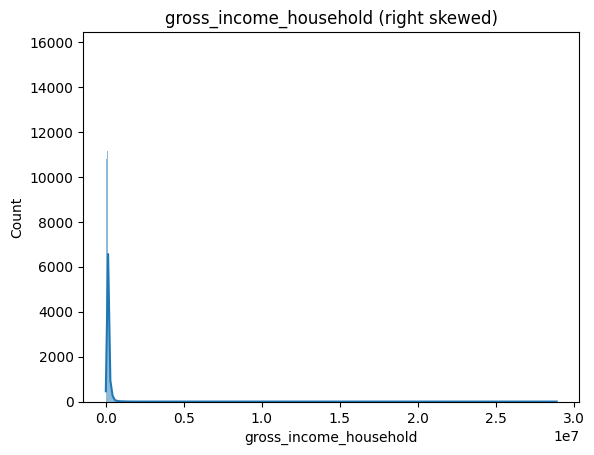

customer_age: right skewed


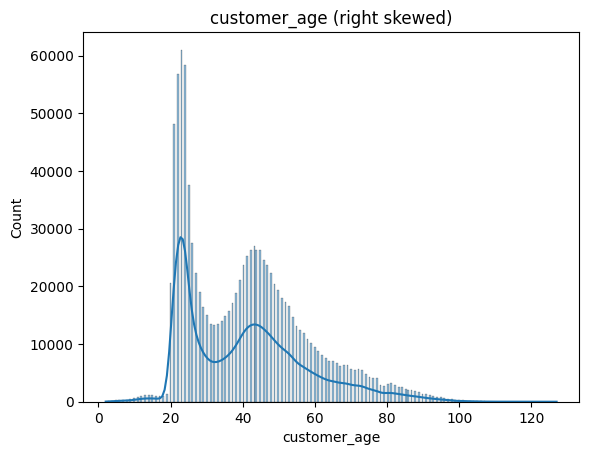

In [14]:
# Import skew function from scipy.stats
from scipy.stats import skew

# Calculate skewness for specified columns and plot a visualization
cols = ["gross_income_household", "customer_age"]
for col in cols:
    skewness = skew(df[col].astype(float))
    if skewness > 0:
        skewness_type = "right skewed"
    elif skewness < 0:
        skewness_type = "left skewed"
    else:
        skewness_type = "symmetric"
    print(f"{col}: {skewness_type}")
    sns.histplot(df[col].astype(float), kde=True)
    plt.title(f"{col} ({skewness_type})")
    plt.show()

The skewness of each histplot above indicates the degree and direction of skewness in the corresponding numerical column of the dataframe `df`. A histogram with a positive skewness (i.e. "right skewed") indicates that the tail of the distribution is longer on the right side, meaning that there are more values on the left side of the distribution and fewer values on the right side. Conversely, a histogram with a negative skewness (i.e. "left skewed") indicates that the tail of the distribution is longer on the left side, meaning that there are more values on the right side of the distribution and fewer values on the left side. A histogram with a skewness of 0 (i.e. "symmetric") indicates that the distribution is roughly balanced and has no significant skewness in either direction. 

In the context of this specific dataset, the histograms with the highest degree of skewness are `"gross_income_household"` (right skewed) and `"customer_age"` (right skewed), indicating that there are more customers with lower household income and younger age, respectively. The histogram for `"customer_seniority"` is also right skewed, indicating that there are more customers with shorter seniority. It is important to consider the skewness of each variable when performing statistical analyses or building machine learning models, as it can affect the accuracy and validity of the results.

The following data cleaning and preparation steps have been undertaken for this project:

1. Data Cleaning:
   - Removed duplicates
   - Handled missing values
   - Converted data types to appropriate formats
   - Removed irrelevant columns
   
2. Feature Engineering:
   - Created new features from existing ones
   - Transformed skewed features
     
3. Outlier Detection:
   - Detected and handled outliers in the data
     

   


The boxplots plotted above show the distribution of the gross income of customers segmented by their account ownership status. From the plots, we can infer the following:

1. Customers who own a payroll account have the highest median gross income, followed by customers who own a pension account and customers who own a particular plus account.

2. Customers who do not own any account have the lowest median gross income.

3. Customers who own a mortgage account have the highest variability in gross income, followed by customers who own a payroll account and customers who own a pension account.

4. Customers who own a particular account have the lowest variability in gross income.

5. Customers who own a payroll account have the highest upper quartile range, indicating that they have a higher proportion of high-income earners.

6. Customers who do not own any account have the highest lower quartile range, indicating that they have a higher proportion of low-income earners.

Overall, the boxplots suggest that there is a strong relationship between account ownership status and gross income, with customers who own certain types of accounts having higher median gross income and lower variability in income compared to customers who do not own any account or own other types of accounts.